In [1]:
from repath.preprocess.patching.apply_transform import LiuTransform
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import loggers as pl_loggers
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, RandomCrop, RandomRotation, Normalize
from torchvision.models import inception_v3

from repath.utils.paths import project_root
import repath.data.datasets.camelyon16 as camelyon16
from repath.preprocess.tissue_detection import TissueDetectorOTSU
from repath.preprocess.patching import GridPatchFinder, SlidesIndex
from repath.preprocess.sampling import split_camelyon16, balanced_sample, weighted_random
from repath.preprocess.augmentation.augments import Rotate, FlipRotate
from repath.utils.seeds import set_seed

"""
Global stuff
"""
experiment_name = "liu"
experiment_root = project_root() / "experiments" / experiment_name
tissue_detector = TissueDetectorOTSU()

global_seed = 123

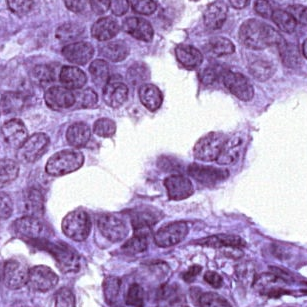

In [12]:
file_loc = experiment_root / 'training_patches' / 'tumor' / 'tumor-tumor_011-70434-112802.png'

from PIL import Image

im = Image.open(file_loc)
im

In [13]:
im.size
im.getbands()

('R', 'G', 'B', 'A')

(307, 307, 3)

In [9]:
set_seed(global_seed)
# index all the patches for the camelyon16 dataset
train_data = camelyon16.training()
train_data.paths = train_data.paths.iloc[60:70, :].reset_index(drop=True)

In [24]:
path = train_data.to_abs_path(train_data.paths.iloc[0, 0])

Slide = train_data.slide_cls(path)

Slide.open()

tnail = Slide.get_thumbnail(6)
tnail.shape

(3432, 1528, 3)

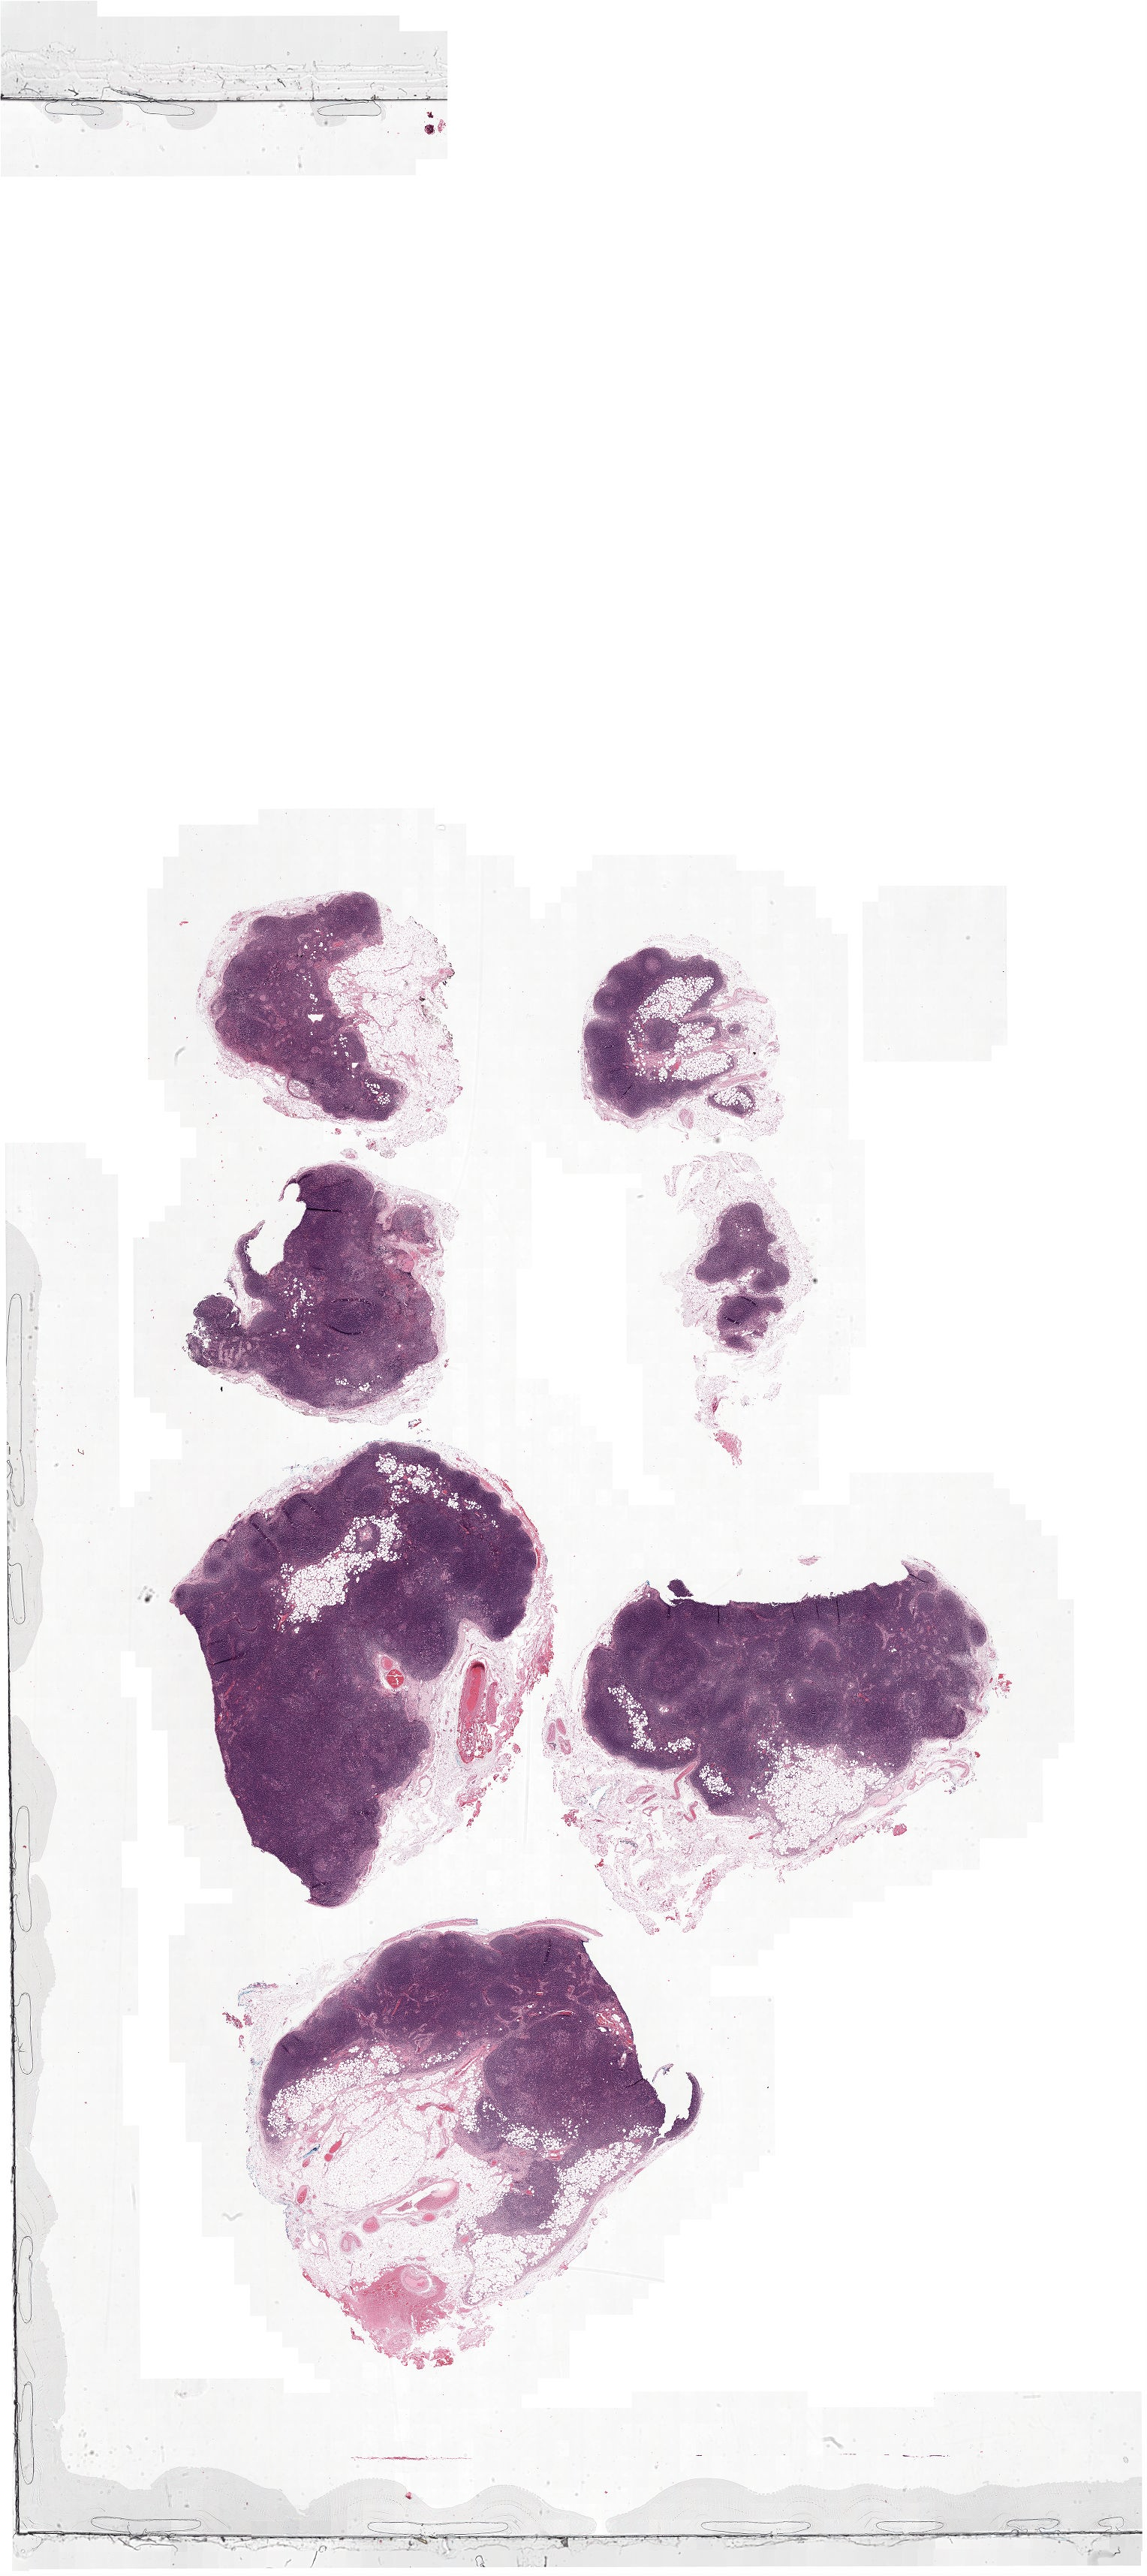

In [25]:
from PIL import Image

Image.fromarray(tnail)

In [4]:
small_train_data.paths

slide annotation   label tags
96  normal/normal_098.tif             normal     
97  normal/normal_099.tif             normal

In [5]:
train_patches = SlidesIndex.index_dataset(small_train_data, tissue_detector, patch_finder)

indexing normal_098.tif
start 128
A shape (3456, 1512)
A_w shape (1728, 756, 2, 2)
kernel size (2, 2)
after border 128
indexing normal_099.tif
start 128
A shape (3368, 1520)
A_w shape (1684, 760, 2, 2)
kernel size (2, 2)
after border 128


In [6]:
train_patches.patch_size

299